# Convolutions on an image

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [70]:
image = np.array(cv2.imread('image.png', cv2.IMREAD_GRAYSCALE))

([], <a list of 0 Text yticklabel objects>)

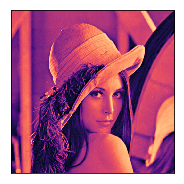

In [71]:
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='magma')
plt.xticks([])
plt.yticks([])

In [72]:
new_image = np.array(image, dtype=np.float32)
new_image = np.expand_dims(new_image, axis=2)
dataset = np.array([new_image, new_image], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [73]:
filters = np.zeros(shape=(24,24,channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [74]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')
with tf.Session() as sess:
  output = sess.run(convolution, feed_dict={X:dataset})

## The second (third) image below corresponds to a feature map obtained after a convolution with a vertical (horizontal) filter.

<Figure size 432x288 with 0 Axes>

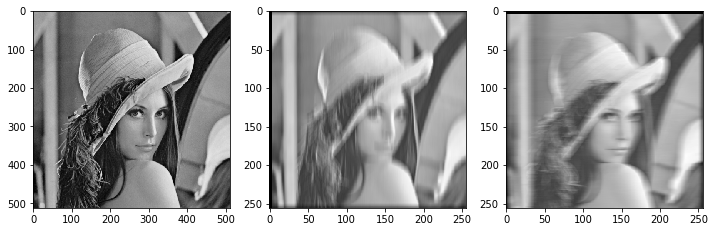

In [78]:
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.imshow(image, cmap='gray')
ax2.imshow(output[0,:,:,0], cmap='gray')
ax3.imshow(output[0,:,:,1], cmap='gray')